# Lecture 6: Common Distribution Families and Conditioning

## Learning Goals

By the end of this lecture, you should be able to:

- Identify and apply common continuous distribution families.
- Identify what makes a function a bivariate probability density function.
- Compute probabilities from bivariate probability density functions.
- Compute conditional distributions for continuous random variables.

```{important} 
Let us make a **note on the Greek alphabet**. Throughout MDS, we will use diverse Greek letters in various statistical topics. Usually, these letters represent distributional parameters. That said, it is not necessary to memorize these letters right away. With practice over time, you will get familiar with this alphabet. You can find the whole alphabet in {doc}`appendix-greek-alphabet`.
```

## 1. Common Continuous Distribution Families

Just like for discrete distributions, there are also parametric families of continuous distributions. [Recall the chart of univariate distributions](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html), where you will find key information, such as their corresponding probability density functions (PDFs). Furthermore, the chart illustrates how these distributions are related via random variable transformations.

In [1]:
library(tidyverse)
source("supplementary/expense.R")
source("supplementary/ships.R")
source("supplementary/octane.R")

── Attaching core tidyverse packages ─────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1.1. [Uniform](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Uniform.pdf)

#### Process

A Uniform distribution has equal density in between two points $a$ and $b$ (for $a < b$), and is usually denoted by

$$X \sim \operatorname{Uniform}(a, b).$$

That means that there are **two parameters**: **one for each end-point**. A reference to a "*Uniform distribution*" usually implies **continuous uniform**, as opposed to discrete uniform.

#### PDF

The density is

$$f_X(x\mid a, b) = \frac{1}{b - a} \qquad \text{for} \quad a \leq x \leq b.$$

Here are some densities from members of this family:

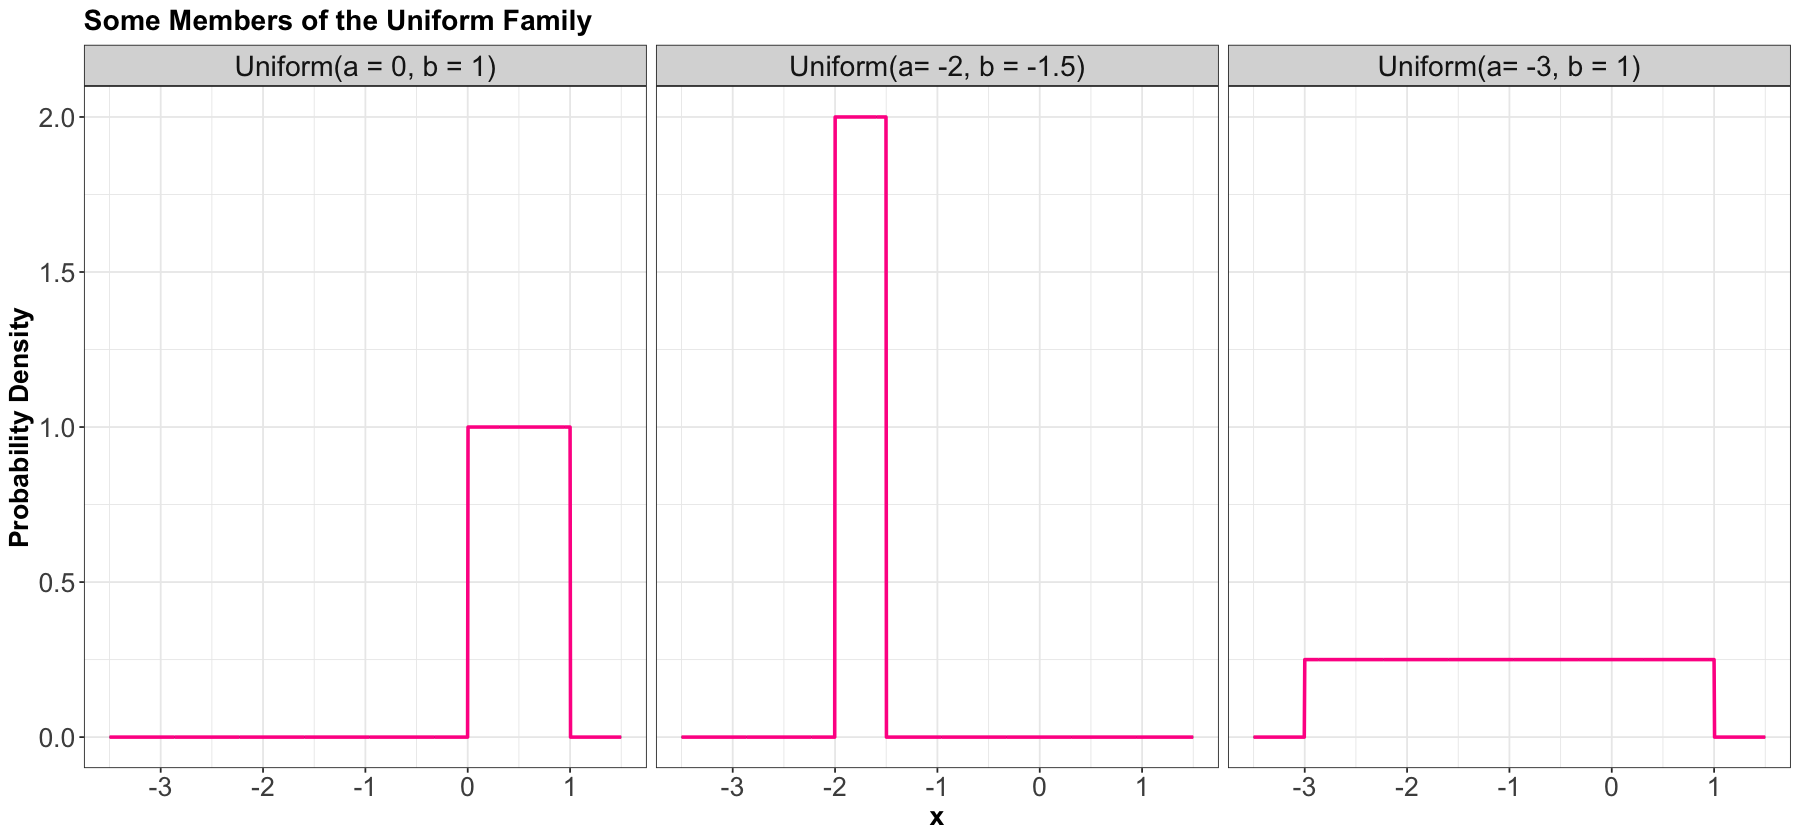

In [2]:
options(repr.plot.height = 7, repr.plot.width = 15)

tibble(
  x = seq(-3.5, 1.5, length.out = 1000),
  `Uniform(a = 0, b = 1)` = dunif(x, min = 0, max = 1),
  `Uniform(a= -3, b = 1)` = dunif(x, min = -3, max = 1),
  `Uniform(a= -2, b = -1.5)` = dunif(x, min = -2, max = -1.5)
) %>%
  pivot_longer(contains("Uniform"), names_to = "distribution", values_to = "density") %>%
  ggplot(aes(x, density)) +
  facet_wrap(~distribution) +
  geom_line() +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("Some Members of the Uniform Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "deeppink", linewidth = 1)

#### Mean

The mean of a Uniform random variable is defined as:

$$\mathbb{E}(X) = \frac{a + b}{2}.$$

#### Variance

The variance of a Uniform random variable is defined as:

$$\text{Var}(X) = \frac{(b - a)^2}{12}.$$

### 1.2. [Gaussian or Normal](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Normal.pdf)

#### Process

Probably the most famous family of distributions. It has a density that follows a **"bell-shaped"** curve. It is parameterized by its mean $-\infty < \mu < \infty$ and variance $\sigma^2 > 0$. A Normal distribution is usually denoted as

$$X \sim \mathcal N\left(\mu, \sigma^2\right).$$

#### PDF

The density is

$$f_X(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\frac{(x - \mu)^2}{2\sigma^2} \right] \qquad \text{for} \quad -\infty < x < \infty.$$

Here are some densities from members of this family:

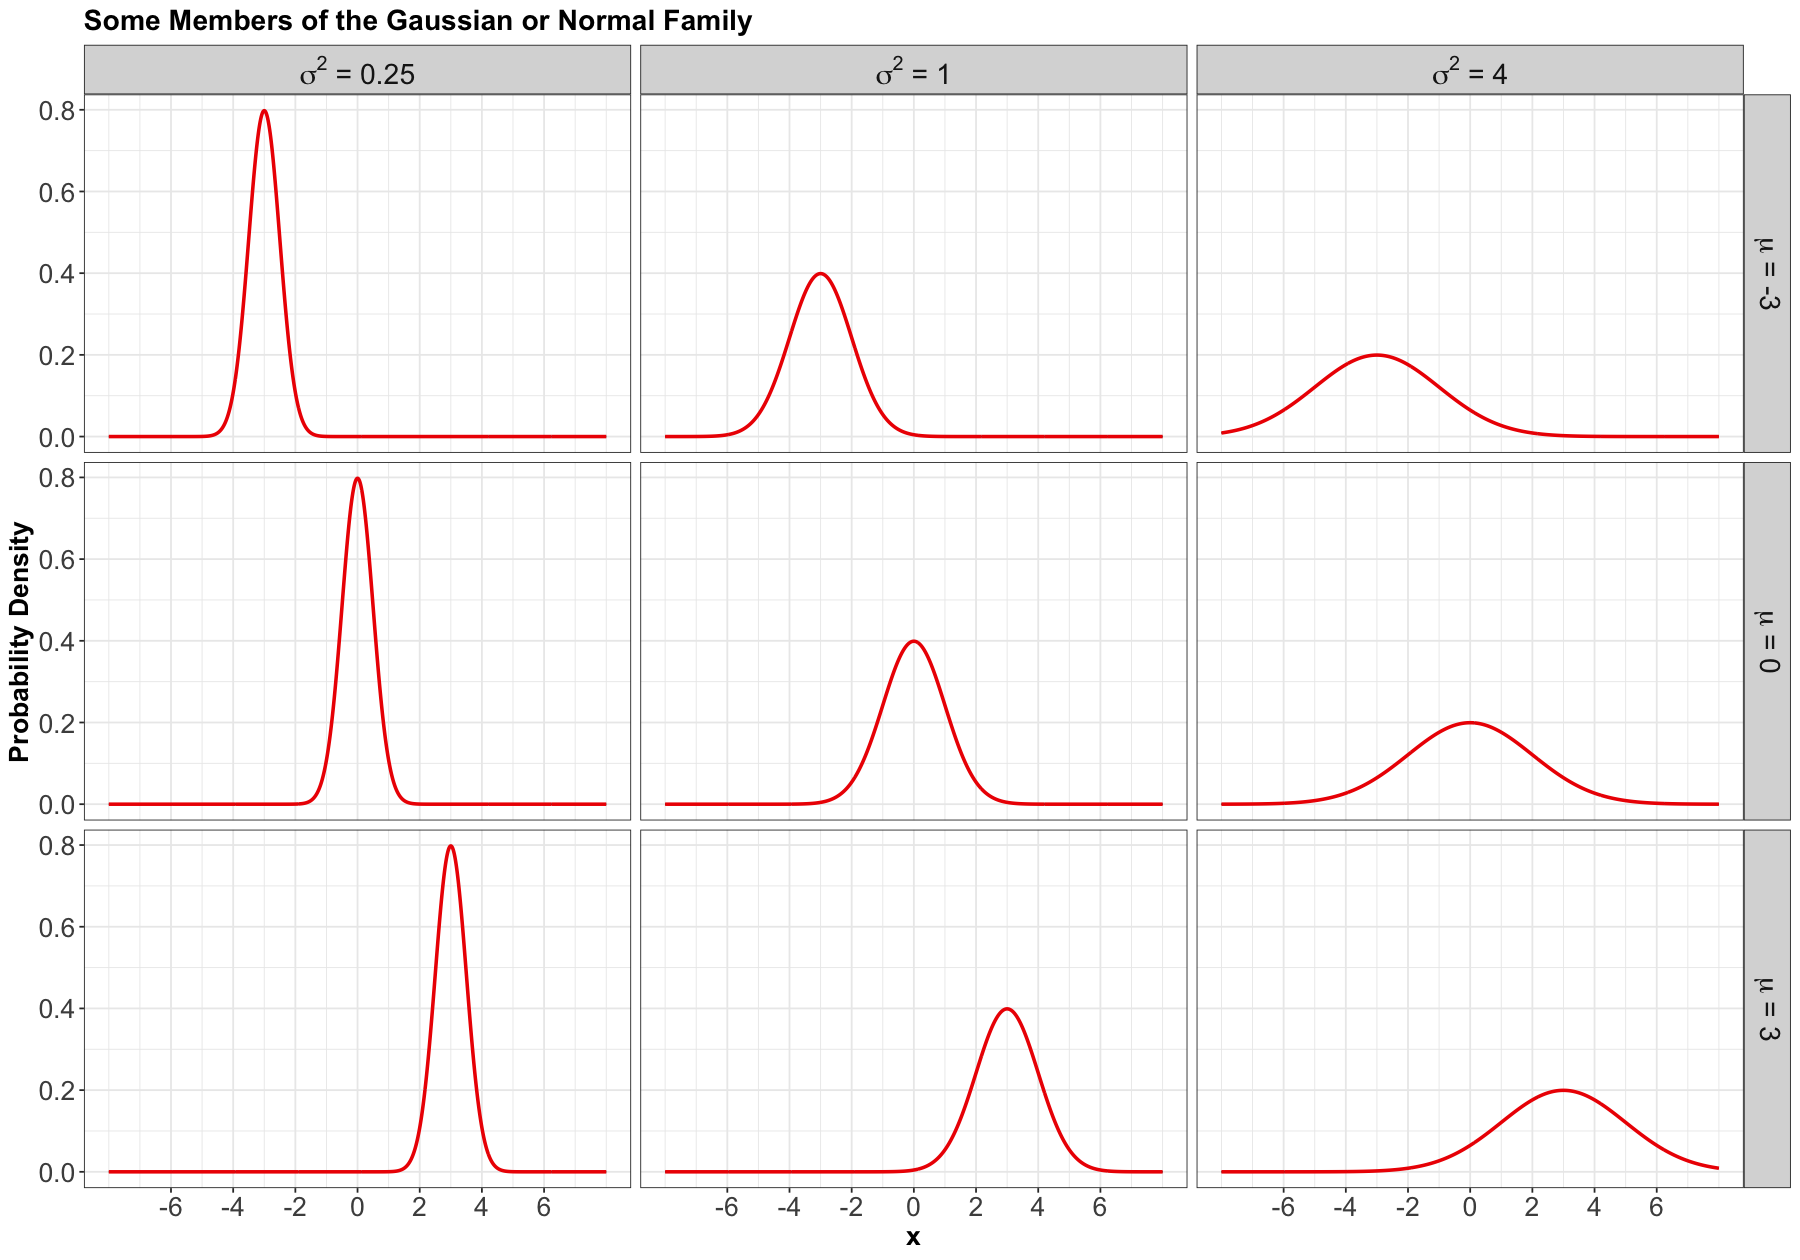

In [3]:
options(repr.plot.height = 10.5, repr.plot.width = 15)

expand_grid(
  mu = c(-3, 0, 3),
  sd = c(0.5, 1, 2)
) %>%
  mutate(f = map2(
    mu, sd,
    ~ tibble(
      x       = seq(-8, 8, length.out = 1000),
      density = dnorm(x, mean = .x, sd = .y)
    )
  )) %>%
  unnest(f) %>%
  mutate(
    mu = str_c('mu*" = ', mu, '"'),
    var = str_c('sigma^2*" = ', sd^2, '"')
  ) %>%
  ggplot(aes(x, density)) +
  facet_grid(mu ~ var, labeller = label_parsed) +
  geom_line() +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("Some Members of the Gaussian or Normal Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "red2", linewidth = 1) + 
  scale_x_continuous(breaks = seq(-6, 6, 2))

#### Mean

The mean of a Normal random variable is defined as:

$$\mathbb{E}(X) = \mu.$$

#### Variance

The variance of a Normal random variable is defined as:

$$\text{Var}(X) = \sigma^2.$$

### 1.3. [Log-Normal](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Lognormal.pdf)

#### Process

A random variable $X$ is a Log-Normal distribution if the transformation $\log(X)$ is Normal. This family is often parameterized by the mean $-\infty < \mu < \infty$ and variance $\sigma^2 > 0$ of $\log X$. The Log-Normal family is denoted as

$$X \sim \operatorname{Log-Normal}\left(\mu, \sigma^2\right).$$

#### PDF

The density is

$$f_X(x \mid \mu, \sigma^2) = \frac{1}{x\sqrt{2\pi \sigma^2}} \exp \left\{ -\frac{[\log(x) - \mu]^2}{2\sigma^2} \right\} \qquad \text{for} \quad x \geq 0.$$

Here are some densities from members of this family:

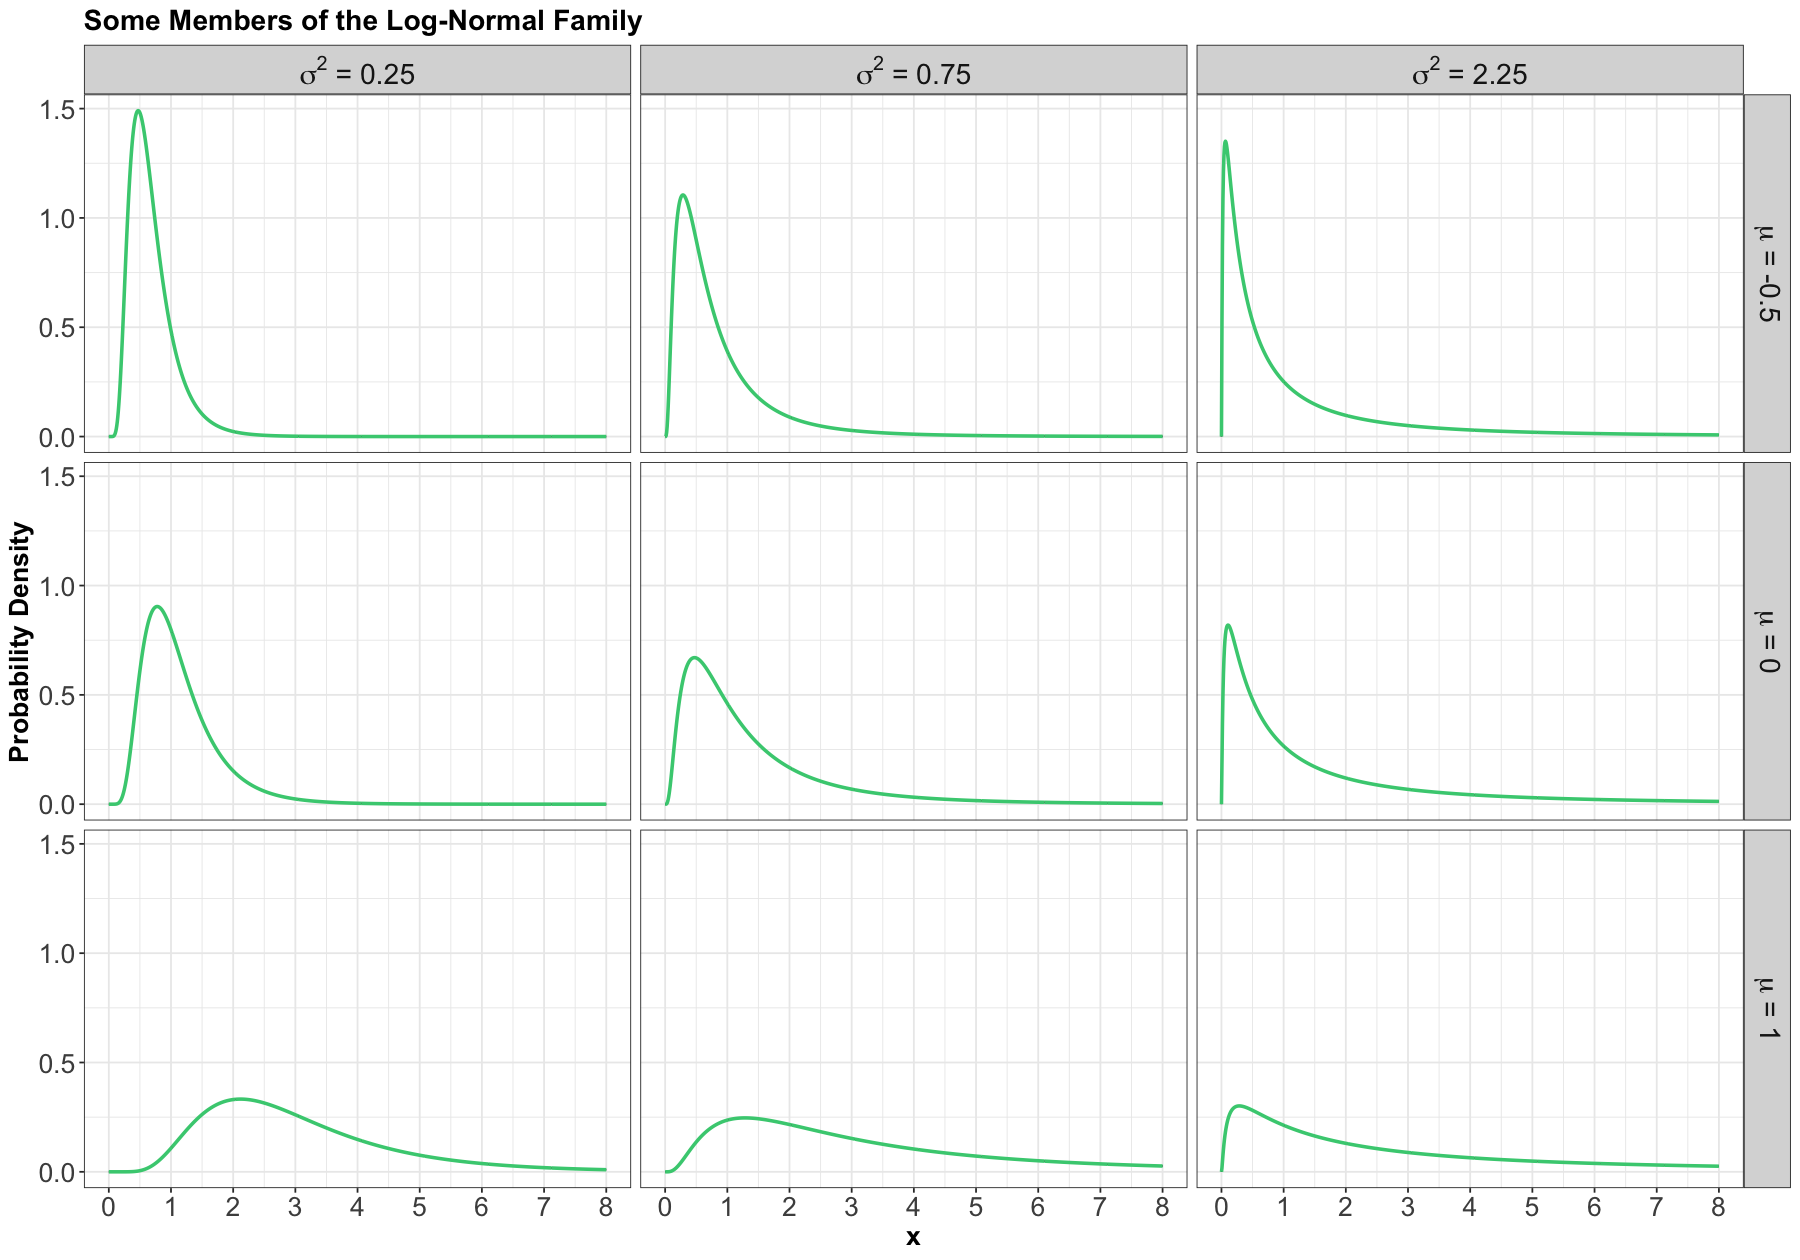

In [4]:
options(repr.plot.height = 10.5, repr.plot.width = 15)

expand_grid(
  meanlog = c(-0.5, 0, 1),
  sdlog = c(0.5, sqrt(0.75), 1.5)
) %>%
  mutate(f = map2(
    meanlog, sdlog,
    ~ tibble(
      x       = seq(0, 8, length.out = 1000),
      density = dlnorm(x, meanlog = .x, sdlog = .y)
    )
  )) %>%
  unnest(f) %>%
  mutate(
    meanlog = str_c('mu*" = ', meanlog, '"'),
    varlog = str_c('sigma^2*" = ', sdlog^2, '"')
  ) %>%
  ggplot(aes(x, density)) +
  facet_grid(meanlog ~ varlog, labeller = label_parsed) +
  geom_line() +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("Some Members of the Log-Normal Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "seagreen3", linewidth = 1) + 
  scale_x_continuous(breaks = seq(0, 8, 1))

#### Mean

The mean of a Log-Normal random variable is defined as:

$$\mathbb{E}(X) = \exp{\left[ \mu + \left( \sigma^2 / 2 \right) \right]}.$$

#### Variance

The variance of a Log-Normal random variable is defined as:

$$\text{Var}(X) = \exp{\left[ 2 \left( \mu + \sigma^2 \right) \right]} - \exp{\left( 2\mu + \sigma^2 \right)}.$$

### 1.4. [Exponential](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Exponential.pdf)

#### Process

The Exponential family is for positive random variables, often interpreted as **wait time** for some event to happen. Characterized by a **memoryless property**, where after waiting for a certain period of time, the remaining wait time has the same distribution. 

The family is characterized by a single parameter, usually either the **mean wait time** $\beta > 0$, or its reciprocal, the **average rate** $\lambda > 0$ at which events happen. 

The Exponential family is denoted as

$$X \sim \operatorname{Exponential}(\beta),$$
or 

$$X \sim \operatorname{Exponential}(\lambda).$$

#### PDF

The density can be parameterized as

$$f_X(x \mid \beta) = \frac{1}{\beta} \exp(-x / \beta) \qquad \text{for} \quad x \geq 0$$
or

$$f_X(x \mid \lambda) = \lambda \exp(-\lambda x) \qquad \text{for} \quad x \geq 0.$$

The densities from this family all decay starting at $x = 0$ for rate $\lambda$:

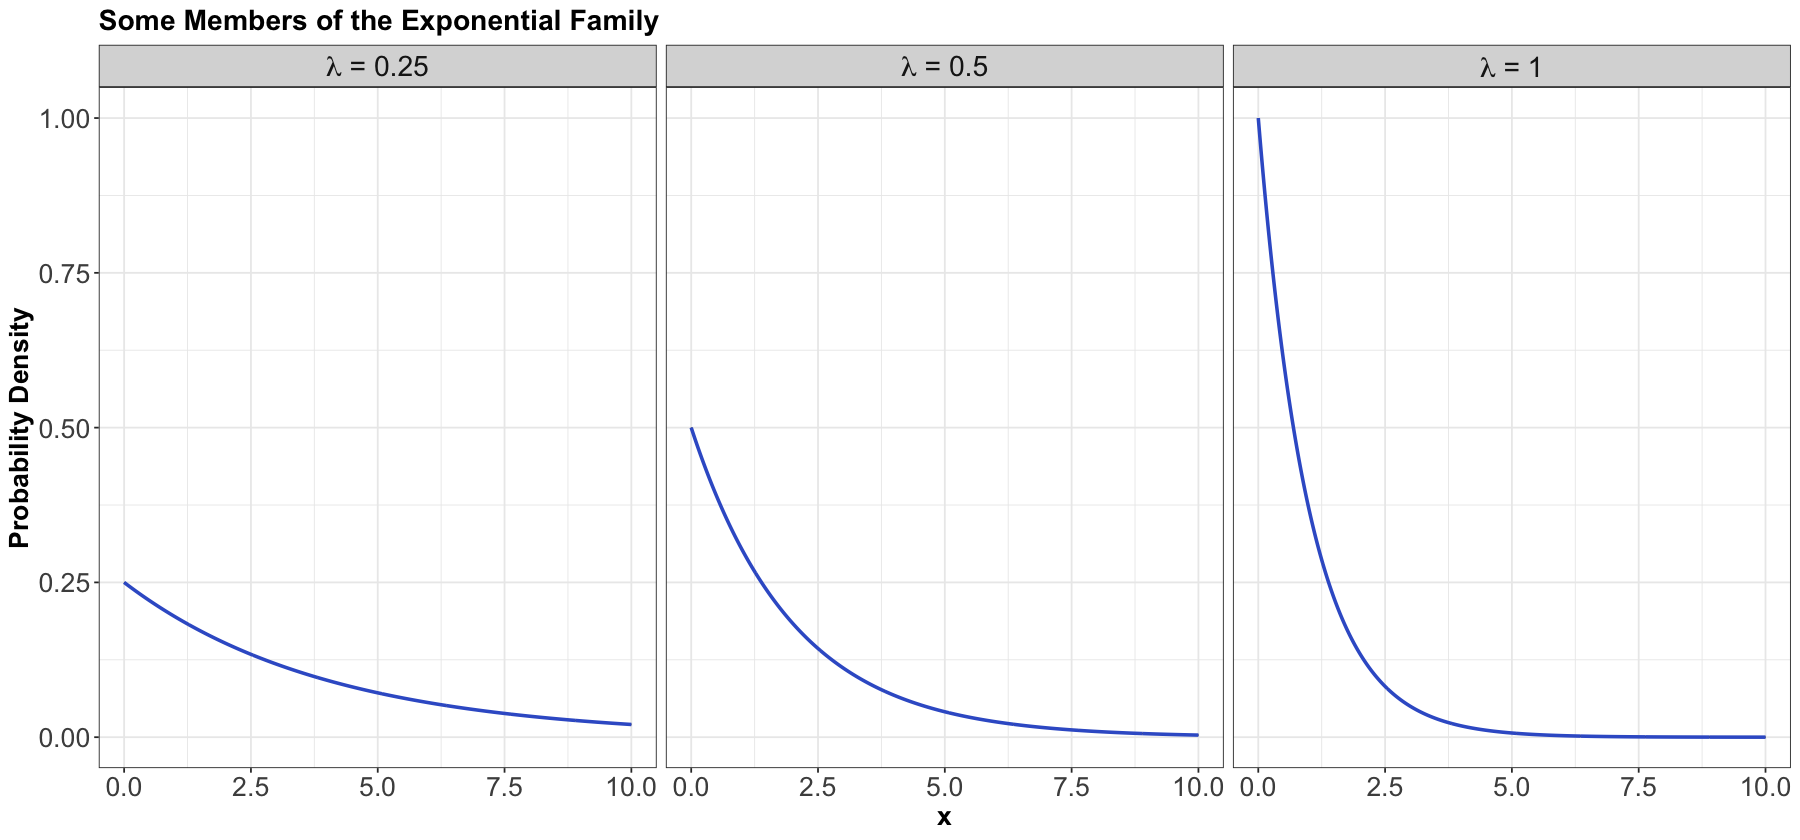

In [5]:
options(repr.plot.height = 7, repr.plot.width = 15)

tibble(lambda = c(1, 0.5, 0.25)) %>%
  mutate(f = map(
    lambda,
    ~ tibble(
      x       = seq(0, 10, length.out = 1000),
      density = dexp(x, rate = .x)
    )
  )) %>%
  unnest(f) %>%
  mutate(lambda = str_c('lambda*" = ', lambda, '"')) %>%
  ggplot(aes(x, density)) +
  facet_wrap(~lambda, labeller = label_parsed) +
  geom_line() +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("Some Members of the Exponential Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "royalblue3", linewidth = 1)

#### Mean

**Using a $\beta$ parameterization**, the mean of an Exponential random variable is defined as:

$$\mathbb{E}(X) = \beta.$$

On the other hand, **using a $\lambda$ parameterization**, the mean of an Exponential random variable is defined as:

$$\mathbb{E}(X) = 1 / \lambda.$$

#### Variance

**Using a $\beta$ parameterization**, the variance of an Exponential random variable is defined as:

$$\text{Var}(X) = \beta^2.$$

On the other hand, **using a $\lambda$ parameterization**, the variance of an Exponential random variable is defined as:

$$\text{Var}(X) = 1 / \lambda^2.$$

### 1.5. [Beta](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Beta.pdf)

#### Process

The Beta family of distributions is defined for random variables taking values between $0$ and $1$, so is useful for modelling the distribution of proportions. This family is quite flexible, and has the Uniform distribution as a special case. It is characterized by two positive shape parameters, $\alpha > 0$ and $\beta > 0$.

The Beta family is denoted as

$$X \sim \operatorname{Beta}(\alpha, \beta).$$

#### PDF

The density is parameterized as

$$f_X(x \mid \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha - 1} (1 - x)^{\beta - 1} \qquad \text{for} \quad 0 \leq x \leq 1,$$

where $\Gamma(\cdot)$ is the [Gamma function](https://www.statlect.com/mathematical-tools/gamma-function).

Here are some examples of densities:

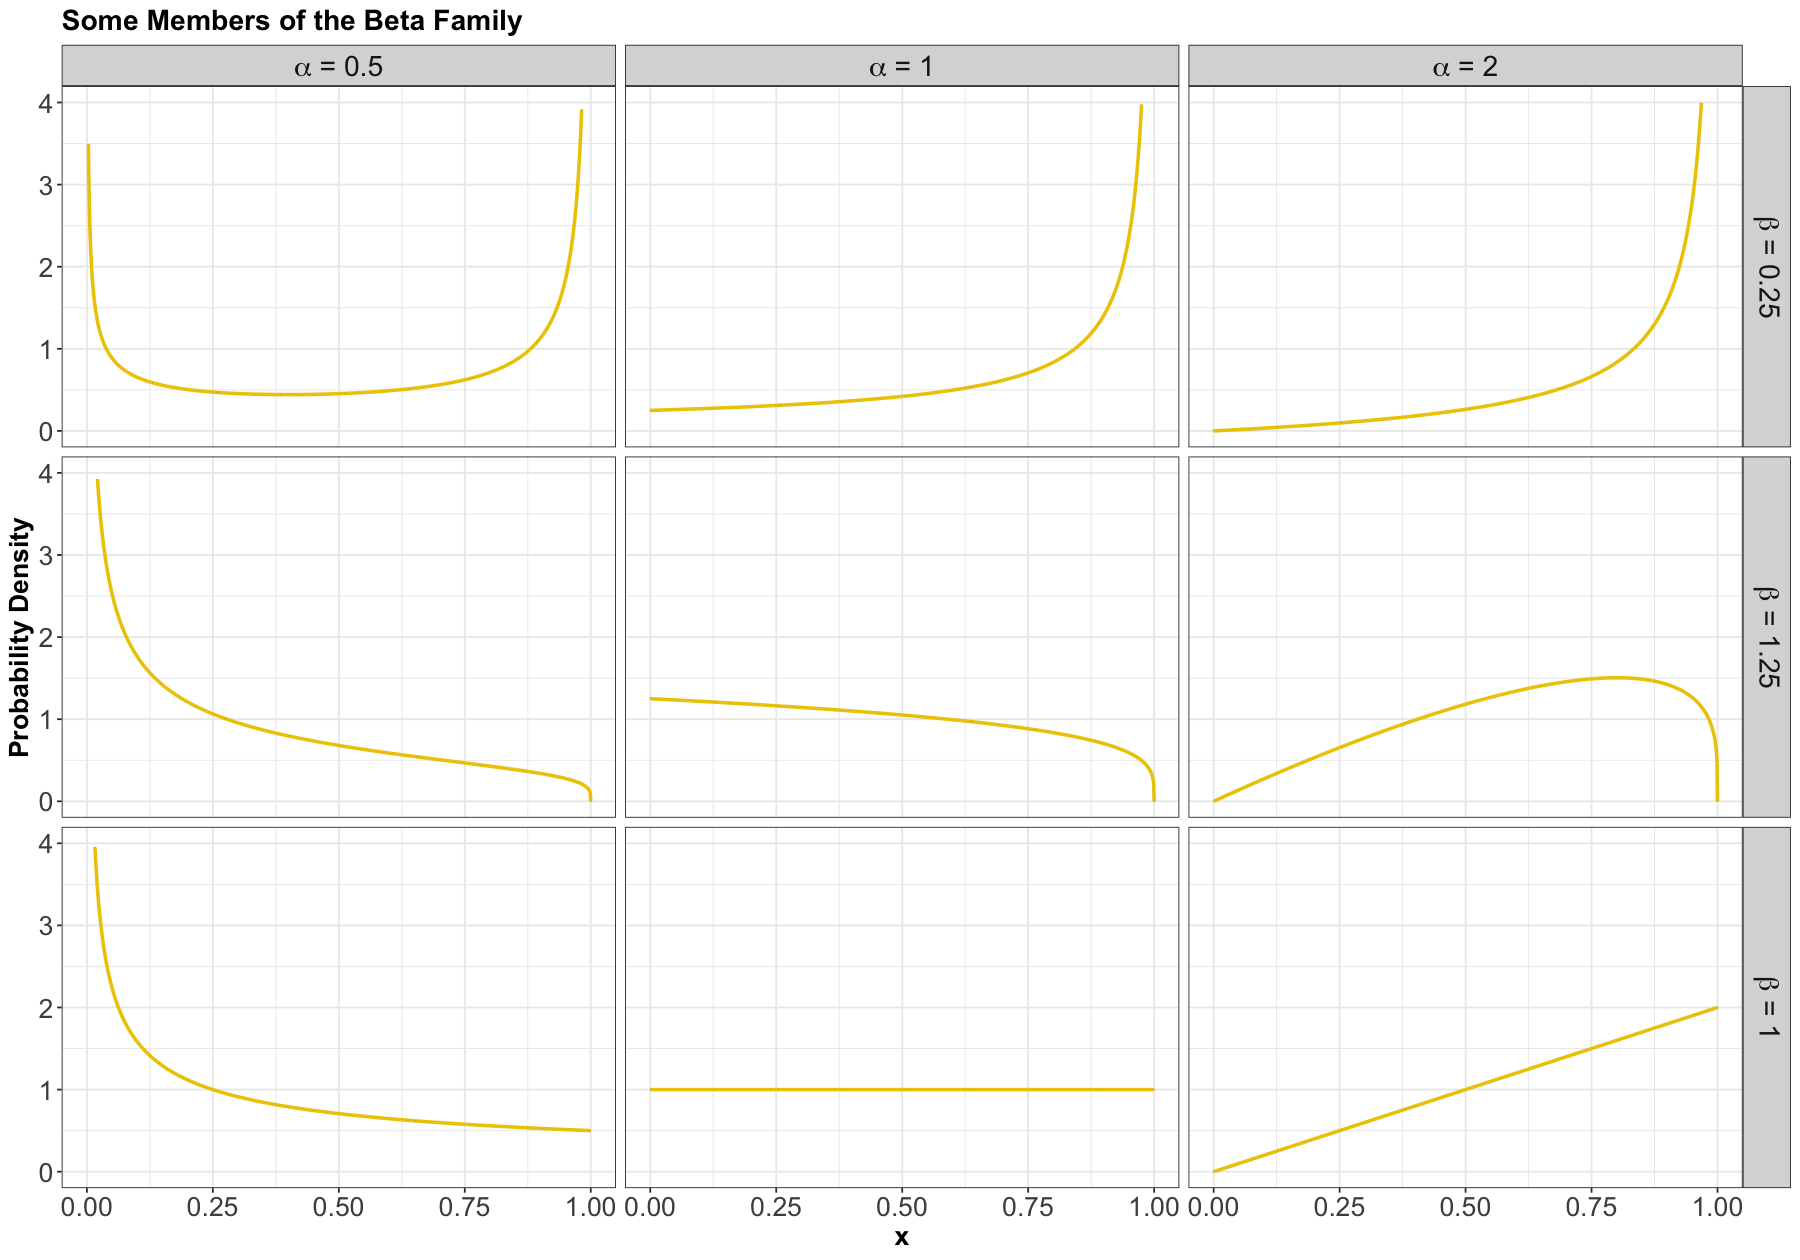

In [6]:
options(repr.plot.height = 10.5, repr.plot.width = 15)

expand_grid(
  alpha = c(0.5, 1, 2),
  beta = c(0.25, 1, 1.25)
) %>%
  mutate(f = map2(
    alpha, beta,
    ~ tibble(
      x       = seq(0, 1, length.out = 1000),
      density = dbeta(x, shape1 = .x, shape2 = .y)
    )
  )) %>%
  unnest(f) %>%
  mutate(
    alpha = str_c('alpha*" = ', alpha, '"'),
    beta = str_c('beta*" = ', beta, '"')
  ) %>%
  ggplot(aes(x, density)) +
  facet_grid(beta ~ alpha, labeller = label_parsed) +
  geom_line() +
  theme_bw() +
  ylim(c(0, 4)) +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("Some Members of the Beta Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "gold2", linewidth = 1)

#### Mean

The mean of a Beta random variable is defined as:

$$\mathbb{E}(X) = \frac{\alpha}{\alpha + \beta}.$$

#### Variance

The variance of a Beta random variable is defined as:

$$\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.$$

### 1.6. [Weibull](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Weibull.pdf)

#### Process

A generalization of the Exponential family, which allows for an event to be more likely the longer you wait. Because of this flexibility and interpretation, this family is used heavily in **survival analysis** when modelling **time until an event**.

This family is characterized by two parameters, a **scale parameter** $\lambda > 0$ and a **shape parameter** $k > 0$ (where $k = 1$ results in the Exponential family).

The Weibull family is denoted as

$$X \sim \operatorname{Weibull}(\lambda, k).$$

#### PDF

The density is parameterized as

$$f_X(x \mid \lambda, k) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k - 1} \exp^{-(x / \lambda)^k} \qquad \text{for} \quad x \geq 0.$$

Here are some examples of densities:

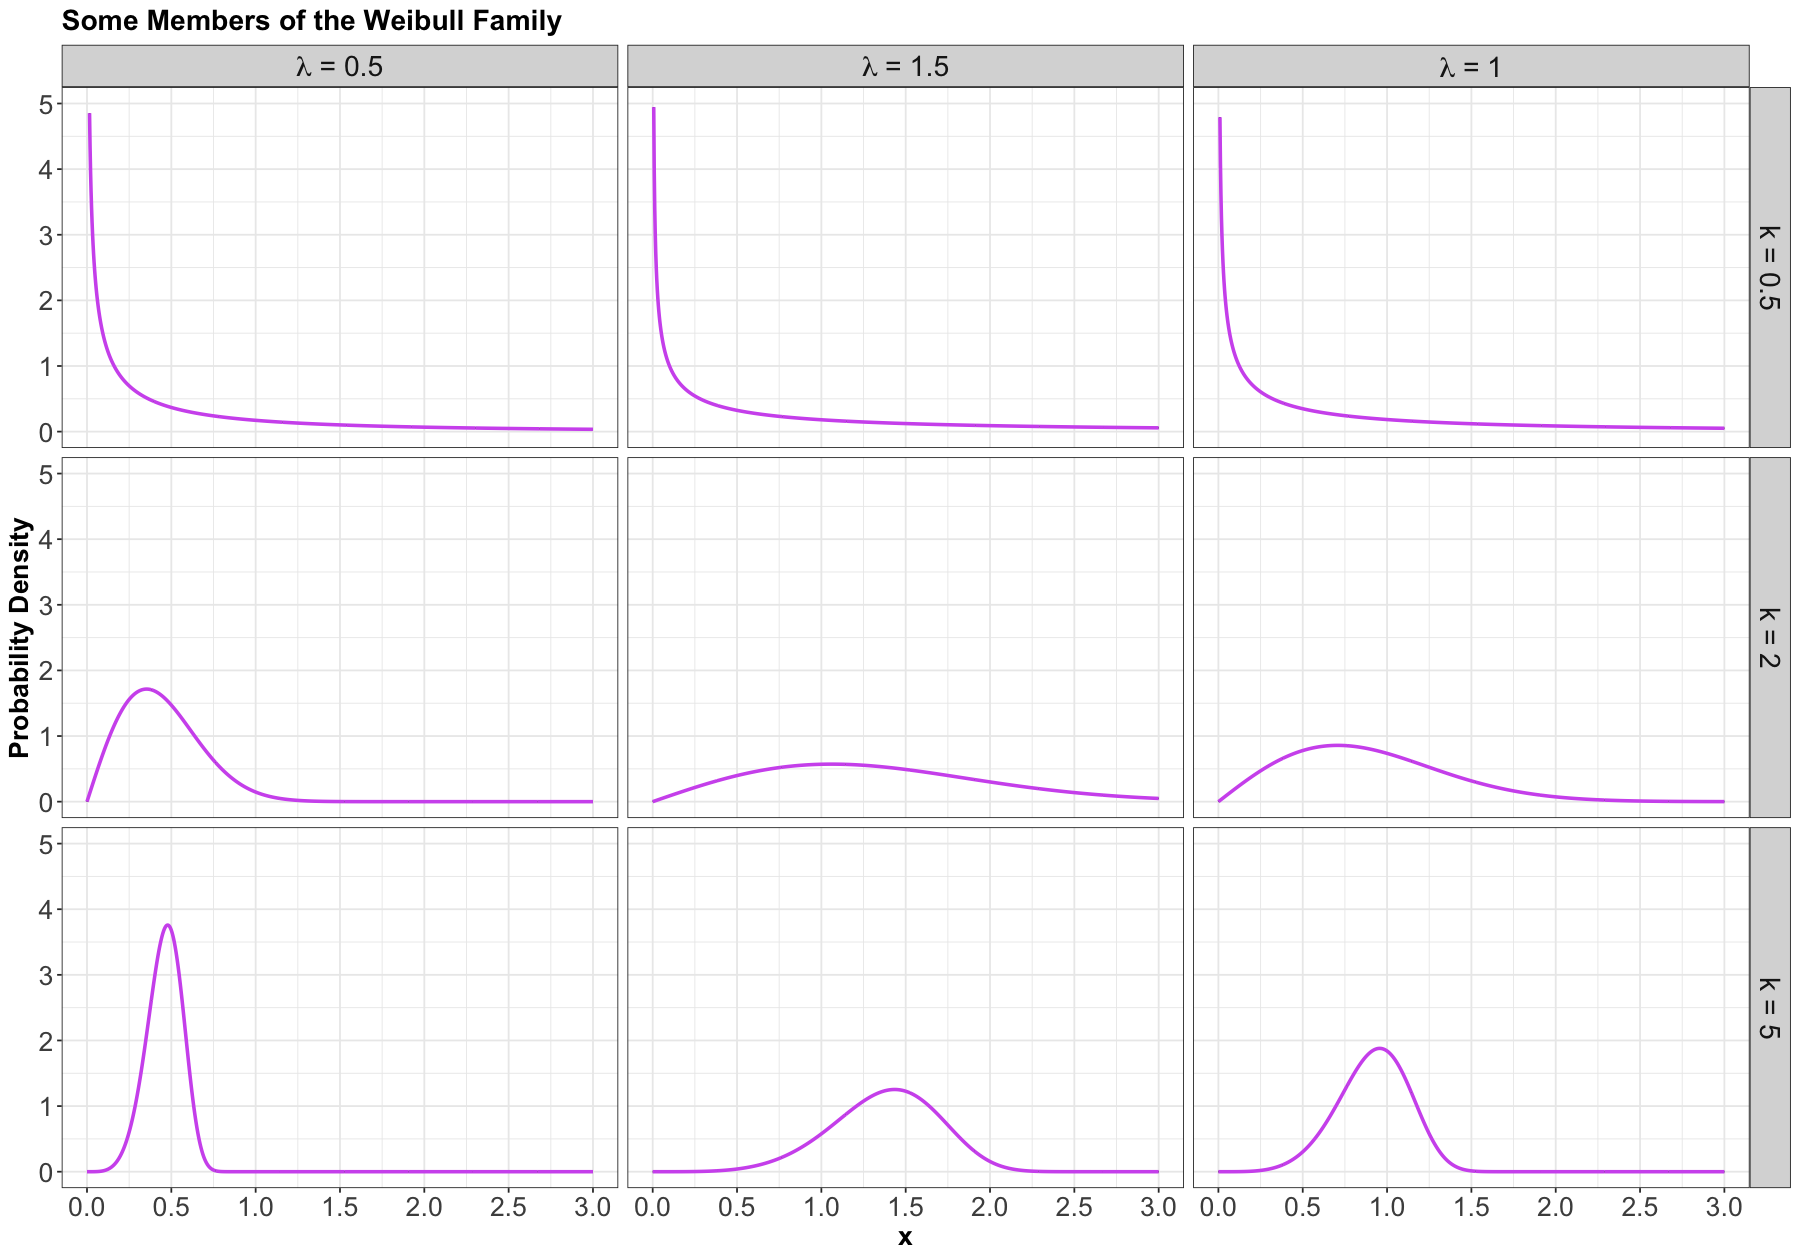

In [7]:
options(repr.plot.height = 10.5, repr.plot.width = 15)

expand_grid(
  k = c(0.5, 2, 5),
  lambda = c(0.5, 1, 1.5)
) %>%
  mutate(f = map2(
    k, lambda,
    ~ tibble(
      x       = seq(0, 3, length.out = 1000),
      density = dweibull(x, shape = .x, scale = .y)
    )
  )) %>%
  unnest(f) %>%
  mutate(
    k = str_c('"k = ', k, '"'),
    lambda = str_c('lambda*" = ', lambda, '"')
  ) %>%
  ggplot(aes(x, density)) +
  facet_grid(k ~ lambda, labeller = label_parsed) +
  geom_line() +
  theme_bw() +
  ylim(c(0, 5)) +
  ggtitle("Some Members of the Weibull Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "mediumorchid2", linewidth = 1) +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) + 
  scale_x_continuous(breaks = seq(0, 3, 0.5))

#### Mean

The mean of a Weibull random variable is defined as:

$$\mathbb{E}(X) = \lambda \Gamma \left( 1 + \frac{1}{k} \right).$$

#### Variance

The variance of a Weibull random variable is defined as:

$$\text{Var}(X) = \lambda^2 \left[ \Gamma \left( 1 + \frac{2}{k} \right) - \Gamma^2 \left( 1 + \frac{1}{k} \right) \right].$$

### 1.7. [Gamma](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Gamma.pdf)

#### Process

Another useful two-parameter family with support on non-negative numbers. One common parameterization is with a shape parameter $k > 0$ and a scale parameter $\theta > 0$.

The Gamma family can be denoted as

$$X \sim \operatorname{Gamma}(k, \theta).$$

#### PDF

The density is parameterized as

$$f_X(x \mid k, \theta) = \frac{1}{\Gamma(k) \theta^k} x^{k - 1} \exp(-x / \theta) \qquad \text{for} \quad x \geq 0,$$

where $\Gamma(\cdot)$ is the [Gamma function](https://www.statlect.com/mathematical-tools/gamma-function).

Here are some densities:

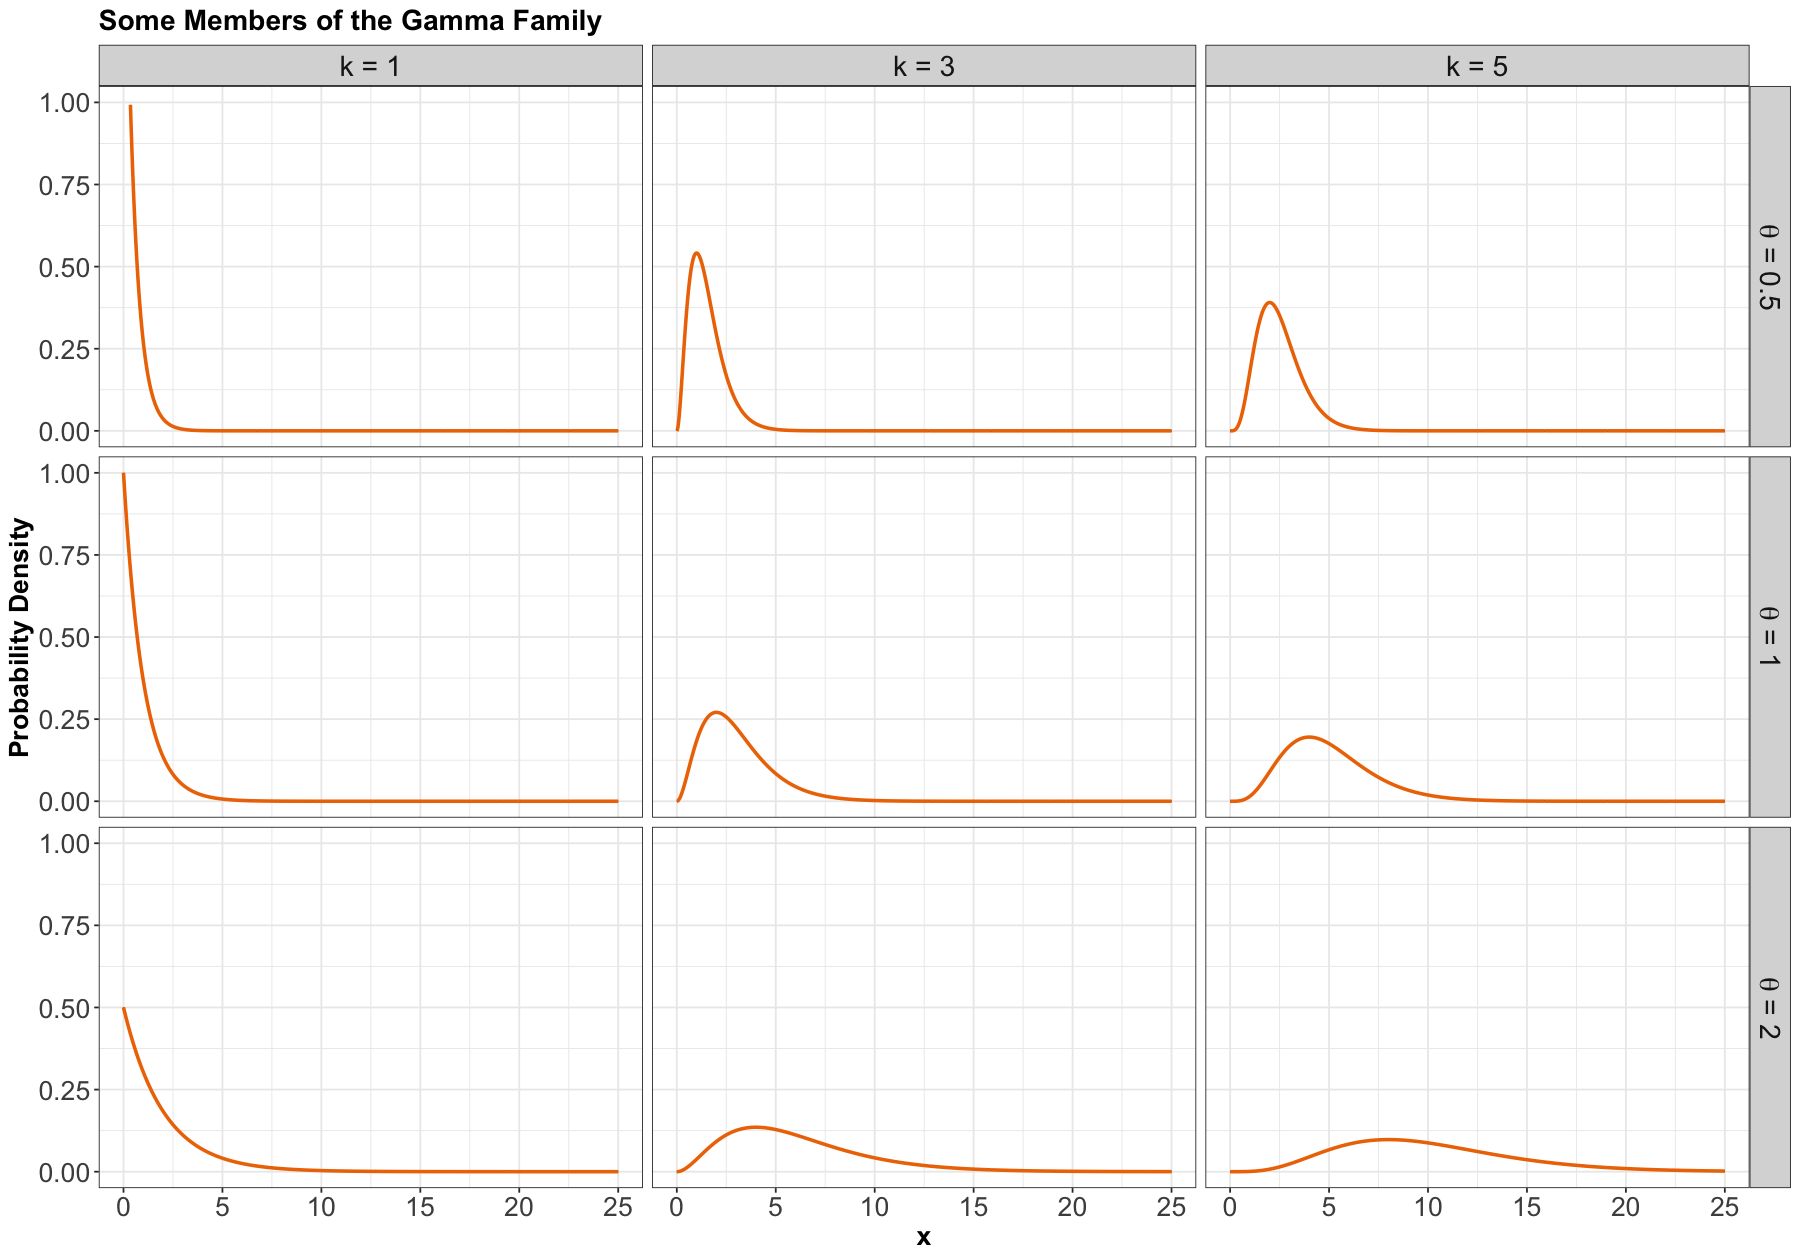

In [8]:
suppressWarnings(print(expand_grid(
  k = c(1, 3, 5),
  theta = c(0.5, 1, 2)
) %>%
  mutate(f = map2(
    k, theta,
    ~ tibble(
      x       = seq(0, 25, length.out = 1000),
      density = dgamma(x, shape = .x, scale = .y)
    )
  )) %>%
  unnest(f) %>%
  mutate(
    k = str_c('"k = ', k, '"'),
    theta = str_c('theta*" = ', theta, '"')
  ) %>%
  ggplot(aes(x, density)) +
  facet_grid(theta ~ k, labeller = label_parsed) +
  geom_line() +
  theme_bw() +
  ylim(c(0, 1)) +
  ggtitle("Some Members of the Gamma Family") +
  labs(
    x = "x",
    y = "Probability Density"
  ) +
  geom_line(color = "darkorange2", linewidth = 1) +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  )))

#### Mean

The mean of a Gamma random variable is defined as:

$$\mathbb{E}(X) = k \theta.$$

#### Variance

The variance of a Gamma random variable is defined as:

$$\text{Var}(X) = k \theta^2.$$

(cont-r-functions)=
### 1.8.  Relevant `R` Functions

`R` has functions for many distribution families. We have seen a few already in the case of discrete families, but here is a more complete overview. 

The functions are of the form `<x><dist>`, where `<dist>` is an abbreviation of a distribution family, and `<x>` is one of `d`, `p`, `q`, or `r`, depending on exactly what about the distribution you would like to calculate.

The possible prefixes for `<x>` indicate the following:

- `d`: density function -- we call this $f_X(x)$.
- `p`: cumulative distribution function (CDF) -- we call this $F_X(x)$.
- `q`: quantile function (inverse CDF).
- `r`: random number generator.

Here are some abbreviations for `<dist>`:

- `unif`: Uniform (continuous).
- `norm`: Normal (continuous).
- `lnorm`: Log-Normal (continuous).
- `geom`: Geometric (discrete).
- `pois`: Poisson (discrete).
- `binom`: Binomial (discrete).
- etc.

Let us check the following examples:

- For the Uniform family, we have the following `R` functions:
    * `dunif()`, `punif()`, `qunif()`, and `runif()`.
- For the Gaussian or Normal family, we have the following `R` functions:
    * `dnorm()`, `pnorm()`, `qnorm()`, and `rnorm()`.
    
```{important} 
For any `R` function, you can get syntax help via the `R` Studio console. For instance, if we want help with the function `dunif()`, we type `?dunif` in the console. More ways to find help can be found [here](https://www.r-project.org/help.html).
```
    
Now, let us proceed with some in-class questions via [**iClicker**](https://student.iclicker.com/).

```{exercise}
:label: lecture6-q1

What `R` function do we need to obtain the density corresponding for $X \sim \mathcal N(\mu = 2, \sigma^2 = 4)$ at point $x = 3$?

Select the correct option:

**A.** `pnorm(q = 3, mean = 2, sd = 2)`

**B.** `dnorm(x = 3, mean = 2, sd = 4)`

**C.** `pnorm(q = 3, mean = 2, sd = 4)`

**D.** `dnorm(x = 3, mean = 2, sd = 2)`
```

```{exercise}
:label: lecture6-q2

What `R` function do we need to obtain the CDF for $X \sim \operatorname{Uniform}(a = 0, b = 2)$ evaluated at points $x = 0.25, 0.5, 0.75$?

Select the correct option:

**A.** `qunif(p = c(0.25, 0.5, 0.75), min = 0, max = 2, lower.tail = TRUE)`

**B.** `punif(q = c(0.25, 0.5, 0.75), min = 0, max = 2, lower.tail = TRUE)`

**C.** `dunif(x = c(0.25, 0.5, 0.75), min = 0, max = 2)`

**D.** `punif(q = c(0.25, 0.5, 0.75), min = 0, max = 2, lower.tail = FALSE)`
```

```{exercise}
:label: lecture6-q3

What `R` function do we need to obtain the median of $X \sim \operatorname{Uniform}(a = 0, b = 2)$?

Select the correct option:

**A.** `qunif(p = 0.5, min = 0, max = 2, lower.tail = TRUE)`

**B.** `punif(q = 0.5, min = 0, max = 2, lower.tail = TRUE)`

**C.** `dunif(x = 0.5, min = 0, max = 2)`

**D.** `punif(q = 0.5, min = 0, max = 2, lower.tail = FALSE)`
```

```{exercise}
:label: lecture6-q4

What `R` function do we need to generate a random sample of size $10$ from the distribution $\mathcal N(\mu = 0, \sigma^2 = 25)$?

Select the correct option:

**A.** `runif(n = 10, min = 0, max = 25)`

**B.** `rnorm(n = 10, mean = 0, sd = 25)`

**C.** `rnorm(n = 10, mean = 0, sd = 5)`

**D.** `runif(n = 10, min = 0, max = 5)`
```

## 2. Continuous Multivariate Distributions

In the discrete case, we already saw [joint distributions](discrete-joint-distributions), [univariate conditional distributions](discrete-univariate-conditional-distributions), [multivariate conditional distributions](discrete-multivariate-conditional-distributions), marginal distributions, etc. All these concepts are carried over to continuous distributions. Let us start with two continuous random variables (i.e., a **bivariate** case).

```{important} 
Let us make a **note on depictions of distributions**. There is such thing as a multivariate CDF. It comes in handy in Copula Theory (a more advanced field in Statistics). But otherwise, it is not as useful as a **multivariate density**, so we will not cover it in this course. Moreover, there is no such thing as a multivariate quantile function.
```

### 2.1. Multivariate Probability Density Functions

Recall the joint **probability mass function** (PMF) from {doc}`03_lecture-joint` between $\text{Gang}$ demand and length of stay ($\text{LOS}$):

In [17]:
raw_data <- data.frame(
  LOS = c(rep(1, 4), rep(2, 4), rep(3, 4), rep(4, 4), rep(5, 4)), Gangs = rep(1:4, 5),
  Probability = c(
    0.00170, 0.04253, 0.12471, 0.08106,
    0.02664, 0.16981, 0.13598, 0.01757,
    0.05109, 0.11563, 0.03203, 0.00125,
    0.04653, 0.04744, 0.00593, 0.00010,
    0.07404, 0.02459, 0.00135, 0.00002
  )
)

joint_distribution <- raw_data %>%
  mutate(
    LOS = str_c("LOS = ", LOS),
    Gangs = str_c("Gang = ", Gangs)
  ) %>%
  pivot_wider(id_cols = LOS, names_from = Gangs, values_from = Probability) %>%
  column_to_rownames("LOS") %>%
  as.matrix()
joint_distribution

Gang = 1 Gang = 2 Gang = 3 Gang = 4
LOS = 1 0.00170  0.04253  0.12471  0.08106 
LOS = 2 0.02664  0.16981  0.13598  0.01757 
LOS = 3 0.05109  0.11563  0.03203  0.00125 
LOS = 4 0.04653  0.04744  0.00593  0.00010 
LOS = 5 0.07404  0.02459  0.00135  0.00002

Each entry in the table corresponds to the probability of that unique row ($\text{LOS}$ value) and column ($\text{Gang}$ value). These probabilities add up to 1.

For the **continuous case**, instead of rows and columns, we have an $x$ and $y$-axis for our two random variables, defining a region of possible values. For example, suppose two marathon runners can only finish a marathon between $5.0$ and $5.5$ hours each, and their end times are totally random. In that case, the possible values are indicated by the **orange square** in the following plot:

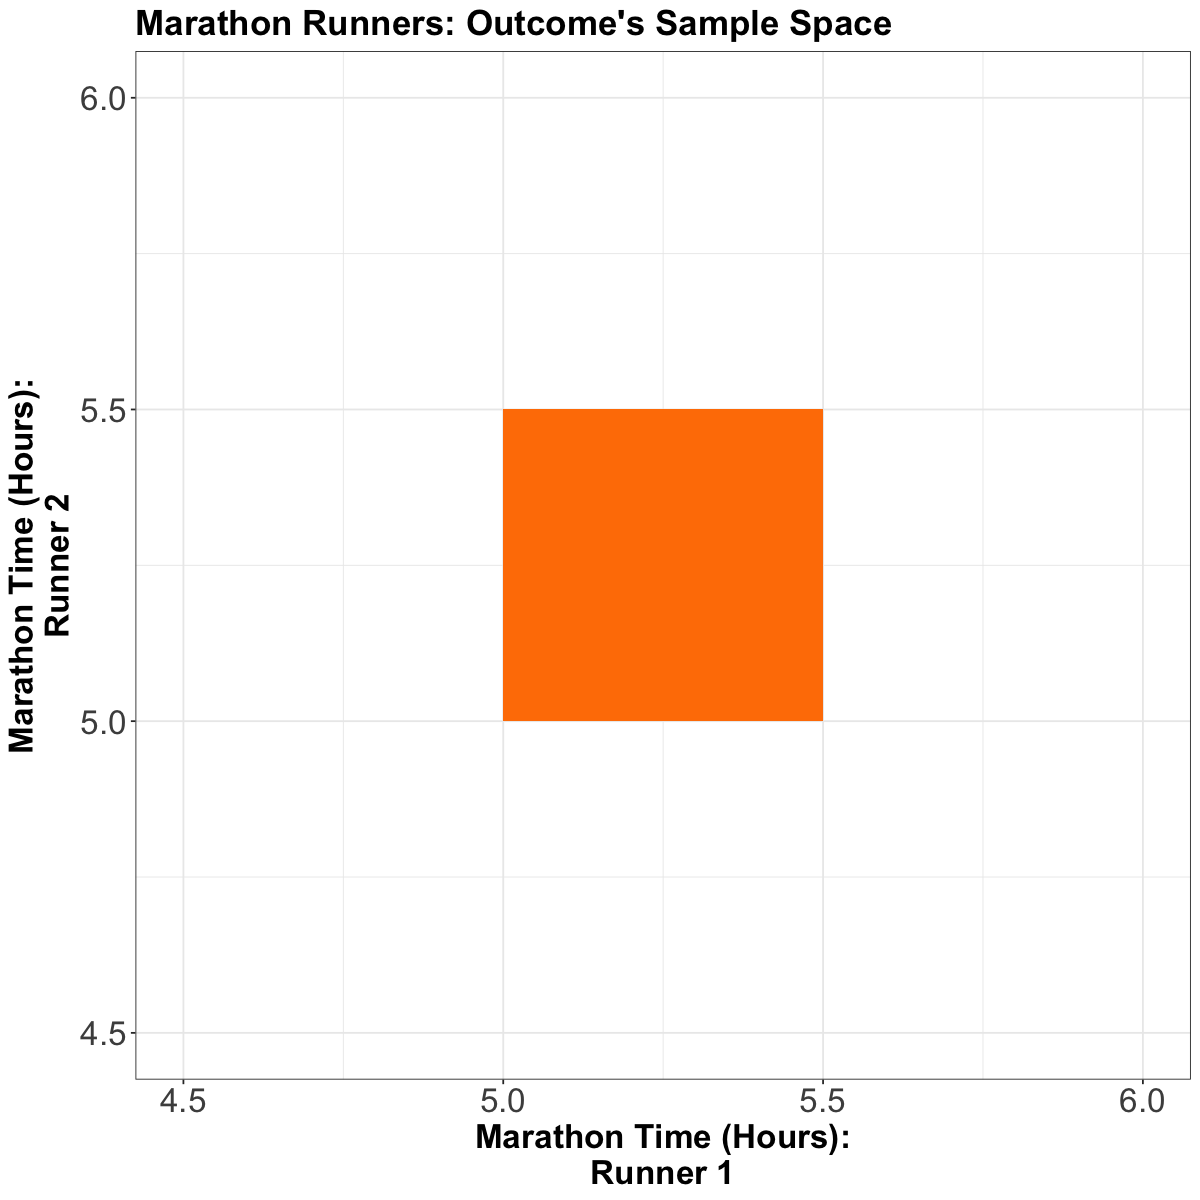

In [18]:
options(repr.plot.height = 10, repr.plot.width = 10)

marathon_space <- tibble(x1 = 5, x2 = 5.5, y1 = 5, y2 = 5.5) %>%
  ggplot() +
  geom_rect(aes(xmin = x1, xmax = x2, ymin = y1, ymax = y2), fill = "darkorange1") +
  scale_x_continuous("Marathon Time (Hours):\nRunner 1", limits = c(4.5, 6)) +
  scale_y_continuous("Marathon Time (Hours):\nRunner 2", limits = c(4.5, 6)) +
  theme_bw() +
  ggtitle("Marathon Runners: Outcome's Sample Space") +
  theme(plot.title = element_text(size = 21, face = "bold"),
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20, face = "bold"))
marathon_space

Each point in the square is like an entry in the joint probability mass function (PMF) table in the discrete case, except now, instead of holding a probability, it holds a **density**. Then, the **density function** is a **surface** overtop of this square (or, generally, the outcome's sample space). It is a function that takes two variables (marathon time for Runner 1 and Runner 2) and calculates a single density value from those two points. This function is called a **bivariate density function**.

We can extend the above plot to a 3D setting as below. Note that the orange distribution surface corresponds to the projection of the joint distribution between the two runners on the $z$-axis.

In [19]:
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [20]:
x_settings <- list(
  title = "Marathon <br>Time (Hours): <br>Runner 1",
  range = c(4.5, 6)
)

y_settings <- list(
  title = "Marathon <br>Time (Hours): <br>Runner 2",
  range = c(4.5, 6)
)

z_settings <- list(
  title = "Probability <br>Density",
  range = c(0, 4)
)

marathon_space_3D <- plot_ly(
  x = c(5, 5, 5.5, 5.5, 5, 5, 5.5, 5.5),
  y = c(5, 5.5, 5.5, 5, 5, 5.5, 5.5, 5),
  z = c(0, 0, 0, 0, 4, 4, 4, 4),
  i = c(7, 0, 0, 0, 4, 4, 2, 6, 4, 0, 3, 7),
  j = c(3, 4, 1, 2, 5, 6, 5, 5, 0, 1, 2, 2),
  k = c(0, 7, 2, 3, 6, 7, 1, 2, 5, 5, 7, 6),
  facecolor = rep(toRGB(viridisLite::inferno(4)), each = 2),
  type = "mesh3d"
) %>%
  layout(scene = list(
    xaxis = x_settings,
    yaxis = y_settings,
    zaxis = z_settings
  ))

marathon_space_3D

HTML widgets cannot be represented in plain text (need html)

### 2.2. Calculating Probabilities

Recall the univariate continuous case; we calculated probabilities as the **area under the density curve**. Now, let us check the specifics of the bivariate density function.

```{admonition} Definition of the Bivariate Probability Density Function
:class: tip
Let $X$ and $Y$ be two random variables. For these two random variables $X$ and $Y$, their joint PDF evaluated at the points $x$ and $y$ is usually denoted

$$f_{X,Y}(x,y).$$

Therefore, we have a **density surface** and can calculate probabilities as the **volume under the density surface**.
This means that the total volume under the density function must equal 1. Formally, this may be written as
$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{X, Y} (x,y)\,\mathrm{d}x\,\mathrm{d}y = 1.$$

Note what this implies about the units of $f_{X, Y}(x,y)$. For example, if $x$ is measured in metres and $y$ is measure in seconds, then the units of $f_{X, Y}(x,y)$ are $\text{m}^{-1} \text{s}^{-1}$.
```

Now, let us answer the following questions:

```{exercise}
:label: lecture6-q5

If the density is equal/flat across the entire sample space, what is the height of this surface? That is, what does the density evaluate to? What does it evaluate to **outside** of the sample space?
```

```{exercise}
:label: lecture6-q6

Let $X$ be the marathon time of Runner 1 in hours, and $Y$ be the marathon time of Runner 2 in hours. What is the probability that Runner 1 will finish the marathon before Runner 2, i.e., $P(X < Y)$? The below plot might be helpful to visualize this.
```

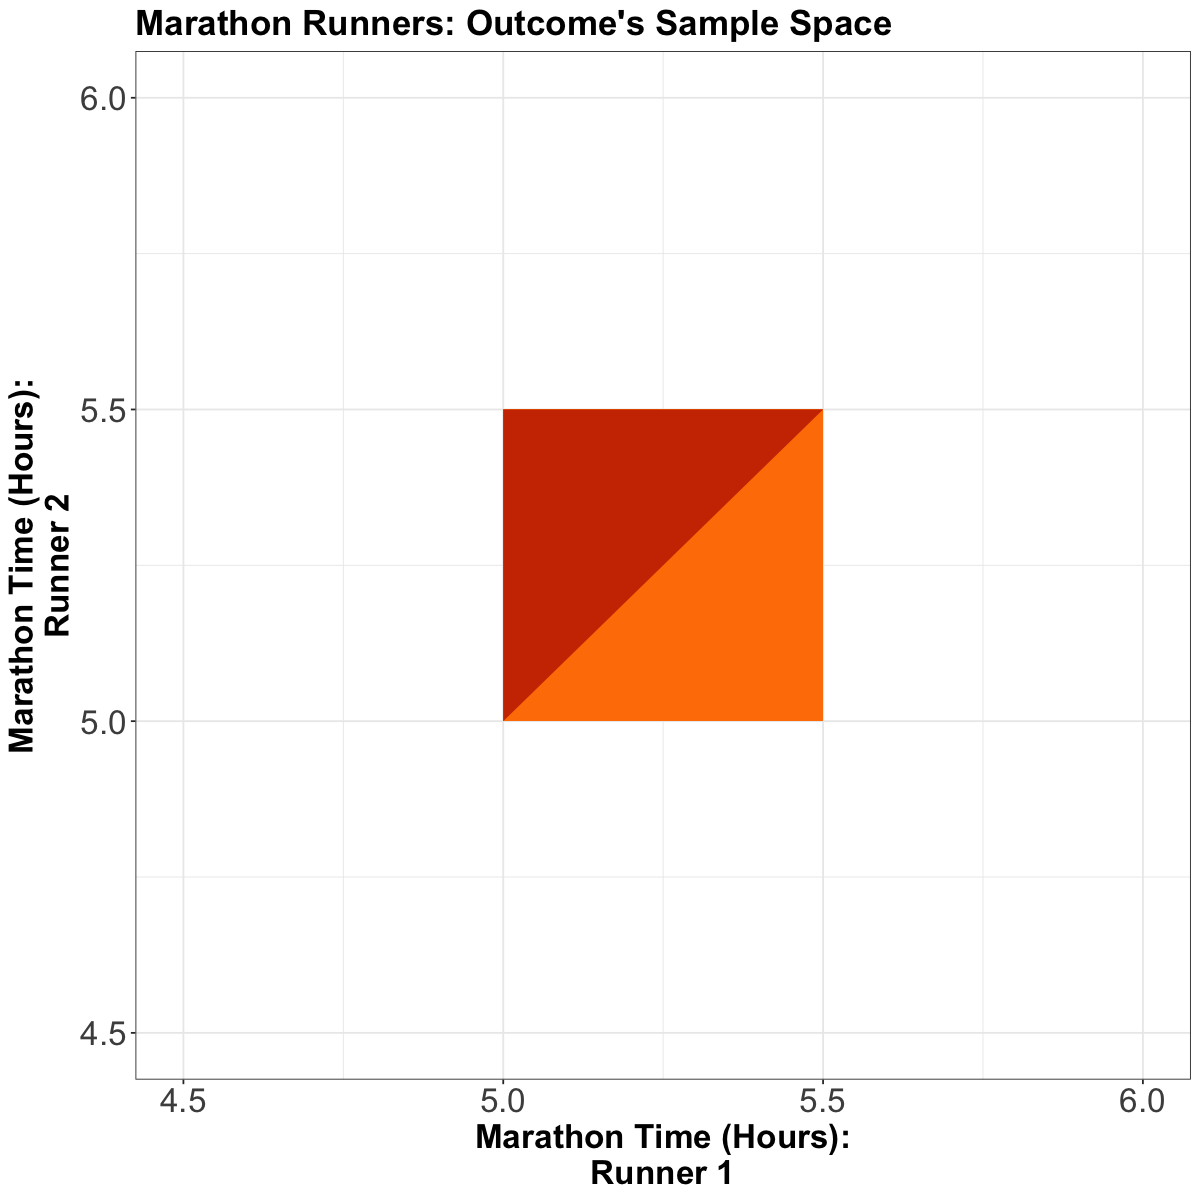

In [22]:
marathon_space +
  geom_polygon(
    data = tibble(
      x = c(5, 5, 5.5),
      y = c(5, 5.5, 5.5)
    ),
    mapping = aes(x, y), fill = "orangered3"
  )

```{exercise}
:label: lecture6-q7

Now, what is the probability that Runner 1 finishes in $5.2$ hours or less, i.e., $P(X \leq 5.2)$? The below plot might be helpful to visualize this.
```

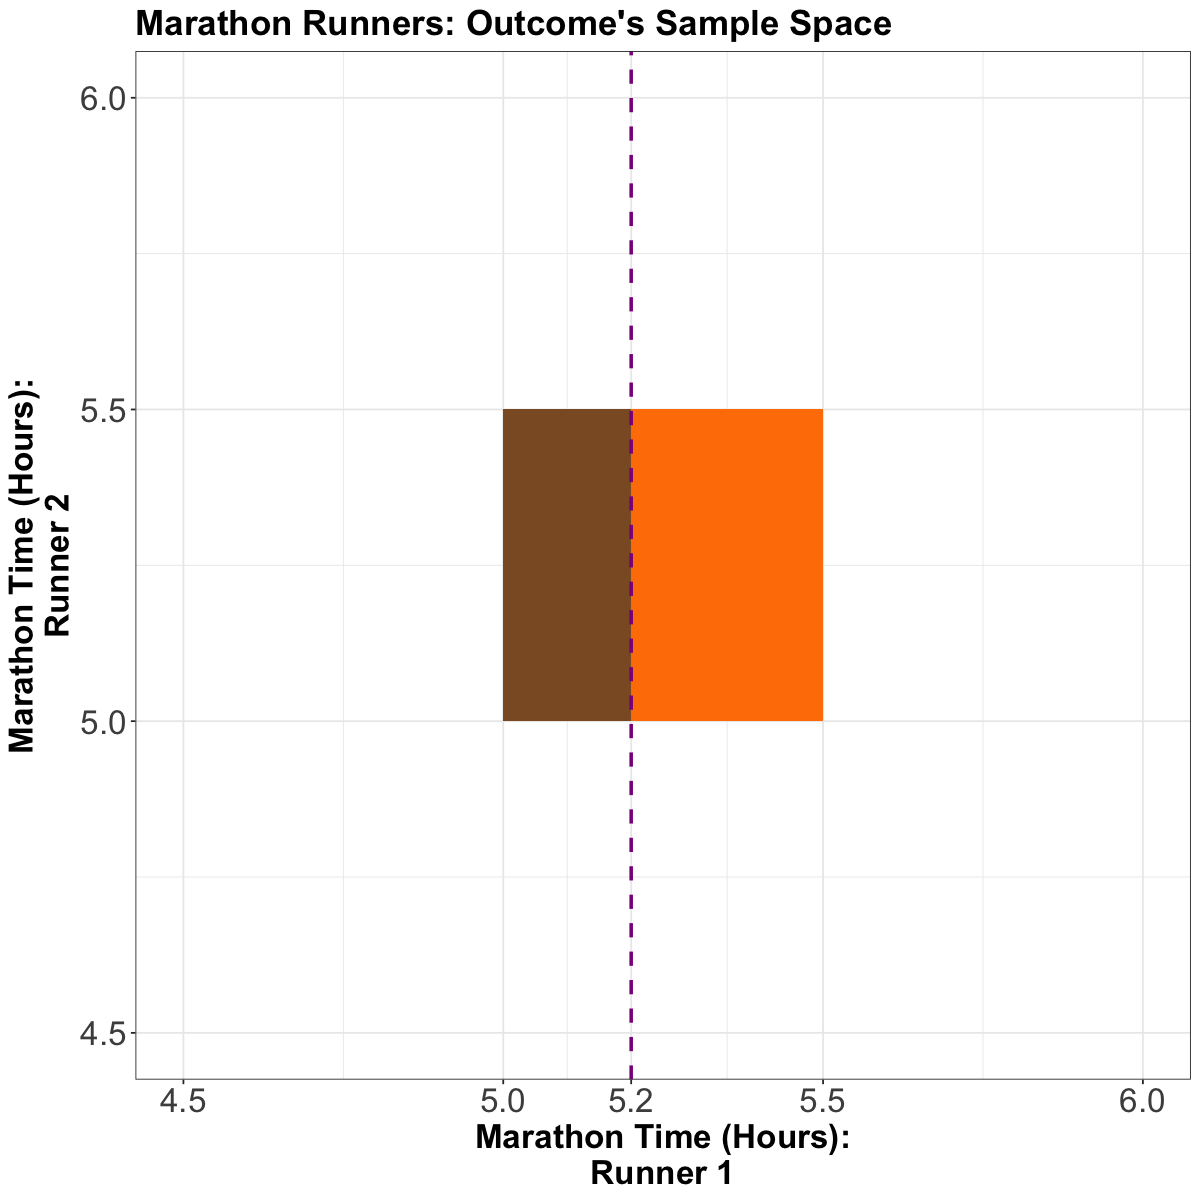

In [21]:
suppressMessages(print(marathon_space +
  geom_rect(aes(xmin = 5, xmax = 5.2, ymin = 5, ymax = 5.5), fill = "tan4") +
  geom_vline(xintercept = 5.2, linetype = "dashed", colour = "darkmagenta", linewidth = 1) +
  scale_x_continuous("Marathon Time (Hours):\nRunner 1", limits = c(4.5, 6), breaks = c(4.5, 5, 5.2, 5.5, 6))))

## 3. Conditional Distributions (Revisited)

Recall the basic formula for conditional probabilities for events $A$ and $B$:

```{math}
:label: cond-prob-revisited
P(A \mid B) = \frac{P(A \cap B)}{P(B)}.
```

Nonetheless, this is only true if $P(B) \neq 0$, and it is not useful if $P(A) = 0$ -- two situations we face in the continuous world

### 3.1. When $P(A) = 0$

To describe this situation, let us use a univariate continuous example: the monthly expenses. Suppose the month is halfway over, and you only have $\$2500$ worth of expenses so far! Given this information, what is the distribution of this month's total expenditures now? 

If we use the Law of Conditional Probability {eq}`cond-prob-revisited`, we would get a formula that is not useful. Let $$X = \text{Monthly Expenses in CAD}.$$
Moreover, assume$$X \sim \operatorname{Log-Normal}(\mu = 8, \sigma^2 = 0.5).$$

Using Equation {eq}`cond-prob-revisited`, the conditional probability **would** be given by

$$P(X = x \mid X \geq 2500) = \frac{P(X = x)}{P(X \geq 2500)} \qquad \qquad \text{(NO!)}$$

This is not good because the outcome $x$ would have a probability of $0$ in a continuous case, which makes no sense!

Instead, in general, **we replace probabilities with densities**. In this case, what we actually have is:$$f_{X \mid X \geq 2500}(x) = \frac{f_X(x)}{P(X \geq 2500)} \qquad \text{for} \quad x \geq 2500,$$
and $$f_{X \mid X \geq 2500}(x) = 0 \qquad \text{for} \quad x < 2500.$$

The formula of the resulting conditional PDF is just the original PDF but confined to $x \geq 2500$, and re-normalized to have area $1$.

Below, we plot the marginal distribution $f_X(x)$ and the conditional distribution $f_{X \mid X \geq 2500}(x)$. Notice the conditional distribution is just a segment of the marginal, and then re-normalized to have an area under the curve equal to $1$.

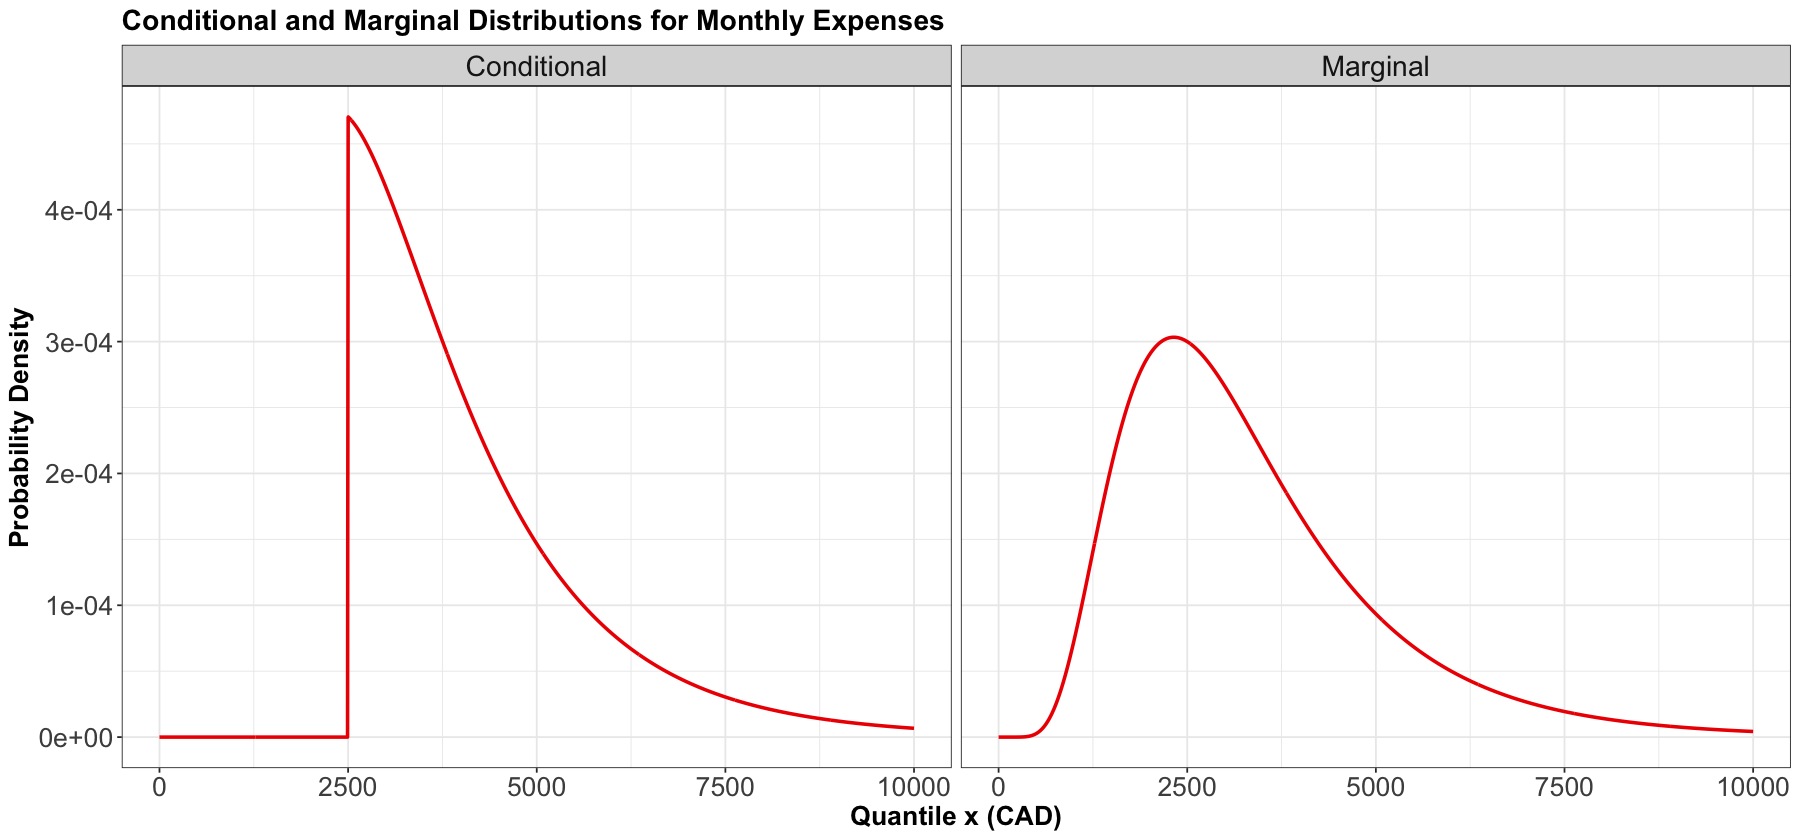

In [22]:
options(repr.plot.height = 7, repr.plot.width = 15)

expense$dcond <- function(x) if_else(x < 2500, 0, expense$ddist(x) / (1 - expense$pdist(2500)))
tibble(x = seq(0, 10000, length.out = 1000)) %>%
  mutate(
    Marginal = expense$ddist(x),
    Conditional = expense$dcond(x)
  ) %>%
  pivot_longer(Marginal:Conditional, names_to = "distribution", values_to = "Density") %>%
  ggplot(aes(x, Density)) +
  facet_wrap(~distribution) +
  geom_line(color = "red2", linewidth = 1) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("Conditional and Marginal Distributions for Monthly Expenses") +
  labs(
    x = "Quantile x (CAD)",
    y = "Probability Density"
  )

### 3.2. When $P(B) = 0$

To describe this situation, let us use the marathon runners' example again:> **If Runner 1 ended up finishing in $5.2$ hours**, what is the distribution of Runner 2's time?

Let $X$ be the time for Runner 1, and $Y$ for Runner 2, what we are asking for is $$f_{Y|X = 5.2}(y).$$

However, we already pointed out that $$P(X = 5.2) = 0.$$ 

Therefore, we need to find a proper workaround. In this case, the stopwatch used to calculate the run time has rounded the true run time to $5.2$ hours, even though, in reality, it would have been something like $5.2133843789373 \dots$ hours.As seen earlier, plugging in the formula for conditional probabilities will not work. But, as in the case of $P(A) = 0$, we can generally replace probabilities with densities.

We end up with$$f_{Y|X = 5.2}(y) = \frac{f_{Y,X}(y, 5.2)}{f_X(5.2)}.$$

This formula is true in general$$f_{Y|X}(y) = \frac{f_{Y,X}(y, x)}{f_X(x)}.$$